# unitary_simulator and operators

Here, we will give a brief overview of how to use `unitary_simulator` to define operators and also a few properties of the `Operator` class

In [1]:
import numpy as np

from qiskit import QuantumCircuit, BasicAer, execute, Aer
from qiskit.quantum_info import Operator, DensityMatrix, Pauli
from qiskit.extensions import YGate
from qiskit.visualization import plot_histogram

## Creating operators with operator class

The `Operator` class is used in Qiskit to represent matrix operators acting on a quantum system: https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html

First, to create an operator object let us initialize it with a list. On that operator we may apply:

* `Operator.data`: To access the underlying Numpy array

* `Operator.dim`: To return the total input and output dimension of the operator

<b> 1. let us define a Cnot operator: <b> 

In [2]:
Cnot = Operator([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
Cnot

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

<b> 2. Returning infos about that operator <b> 

In [3]:
#returns Numpy array
Cnot.data

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In [4]:
#total input and output dimension
in_dim, out_dim = Cnot.dim
in_dim, out_dim

(4, 4)

## Creating operator of circuits

As an example, let's build a operator of a GHZ State. The circuit is

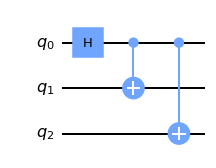

In [5]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx([0,0],[1,2])
ghz.draw('mpl')

then we define an operator based on the GHZ circuit

In [6]:
U_ghz = Operator(ghz) 
np.around(U_ghz.data,3)

#np.around specifies how many decimals is desired in the oputput 

array([[ 0.707+0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707+0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

## Creating operators with unitary_simulator

`unitary_simulator` it sets the ideal quantum circuit unitary simulator: https://qiskit.org/documentation/stubs/qiskit.providers.aer.UnitarySimulator.html

Based on the GHZ cirucuit, `unitary_simulator` returns the corrsponding unitary.

In [7]:
#Aer has also a unitary_simulator backend.
back_uni = Aer.get_backend('unitary_simulator')
job = execute(ghz, back_uni)
result = job.result()

#getting the unitary
U_qc = result.get_unitary(decimals=3)

U_qc 

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
           -0.707+0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
            0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 

## Density matrix

`DensityMatrix` initializes a density matrix object

In [8]:
op1 = [[1+0.j, 0.5+0.j], [0.5+0.j, 1+0.j]]
op2 = [[0.5+0.j, 1+0.j], [0.5+0.j, 1+0.j]]

matrix = DensityMatrix(op1)

#doing the tensor product between op1 and op2
matrix.tensor(op2)

DensityMatrix([[0.5 +0.j, 1.  +0.j, 0.25+0.j, 0.5 +0.j],
               [0.5 +0.j, 1.  +0.j, 0.25+0.j, 0.5 +0.j],
               [0.25+0.j, 0.5 +0.j, 0.5 +0.j, 1.  +0.j],
               [0.25+0.j, 0.5 +0.j, 0.5 +0.j, 1.  +0.j]],
              dims=(2, 2))


## Comparing operators

We can also check if two operators are equal

In [9]:
# Pauli('Y') generates the Pauli Y-matrix object 
# On the other hand, Operator generates the operator of Pauli('Y') 

Operator( Pauli('Y')) == Operator(YGate())

True

In [10]:
Operator(YGate()) == np.exp(1j * 0.4) * Operator(YGate())

False

## Using Operators in circuits

An operator can be directly put into a QuantumCircuit using the `QuantumCircuit.append` method.


In [11]:
XX = Operator(Pauli('XX'))
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

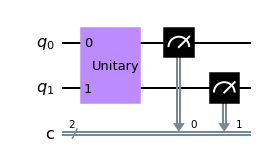

In [12]:
# Create an operator
XX = Operator(Pauli('XX'))

# Add to a circuit
qc = QuantumCircuit(2, 2)
qc.append(XX, [0, 1])
qc.measure([0,1], [0,1])

qc.draw('mpl')

Running it

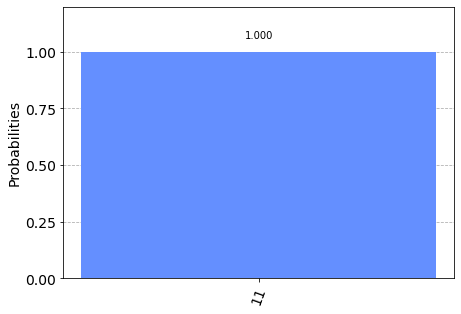

In [13]:
backend = BasicAer.get_backend('qasm_simulator')
result = backend.run(qc).result()

counts = result.get_counts()
plot_histogram(counts)

## Operations with operators

<b> 1. <b> We can also compose two operators (using the XX case)

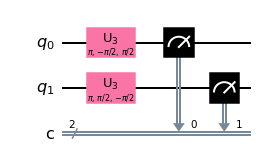

In [14]:
decomp = qc.decompose()
decomp.draw('mpl')

<b> 2. <b> We can also compose operators 

In [15]:
op1 = Operator(Pauli('Y'))
op2 = Operator(Pauli('Z'))
op1.compose(op2, front=True)

Operator([[0.+0.j, 0.+1.j],
          [0.+1.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

<b> 3. <b> Also tensor product is possible

In [16]:
op1 = Operator(Pauli('X'))
op2 = Operator(Pauli('Y'))
op1.tensor(op2)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
          [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
          [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))